In [63]:
from stravalib.client import Client
import pandas as pd
import stravalib
import webbrowser
import matplotlib.pyplot as plt
plt.style.use('ggplot')

client_id, secret = open('client.secret').read().strip().split(',')
client = stravalib.client.Client()
redirect_uri='http://localhost:8282/authorized'
scope = "activity:read_all"

auth_url = "https://www.strava.com/oauth/authorize?client_id={}&response_type=code&redirect_uri={}&scope={}".format(client_id,redirect_uri,scope)


In [64]:
print auth_url

https://www.strava.com/oauth/authorize?client_id=23579&response_type=code&redirect_uri=http://localhost:8282/authorized&scope=activity:read_all


In [66]:
webbrowser.open(auth_url)
code='bc6f525e3cd05d8fba62225035b30e6fa870583f'

In [67]:
access_token = client.exchange_code_for_token(client_id=client_id,
                                             client_secret=secret,
                                             code=code)

In [68]:
client = Client(access_token=access_token)
all_acts = client.get_activities() # Get current athlete details
all_acts.limit = 10

In [69]:
for i in all_acts:
    print i

<Activity id=3323103115 name=u"T's Brick Run" resource_state=2>
<Activity id=3317483312 name=u'Group Workout: Lazy Mountain' resource_state=2>
<Activity id=3313706686 name=u'Afternoon Run' resource_state=2>
<Activity id=3309205763 name=u'Pettit +1' resource_state=2>
<Activity id=3268435703 name=u'Afternoon Run' resource_state=2>
<Activity id=3259587461 name=u'Lunch Activity' resource_state=2>
<Activity id=3239124145 name=u'Elephants -2' resource_state=2>
<Activity id=3239054586 name=u'Elephants -2' resource_state=2>
<Activity id=3228574902 name=u'Quick Brick.' resource_state=2>
<Activity id=3228260754 name=u'Avalanche Spire' resource_state=2>


In [80]:
types=['time', 'latlng', 'distance', 'altitude', 'velocity_smooth',
'heartrate', 'cadence', 'watts', 'temp', 'moving', 'grade_smooth']

tmp_0 = client.get_activity_streams(3228574902,types=types)

tmp_0.keys()

[u'distance',
 u'heartrate',
 u'temp',
 u'altitude',
 u'grade_smooth',
 u'moving',
 u'time',
 u'velocity_smooth',
 u'latlng',
 u'cadence']

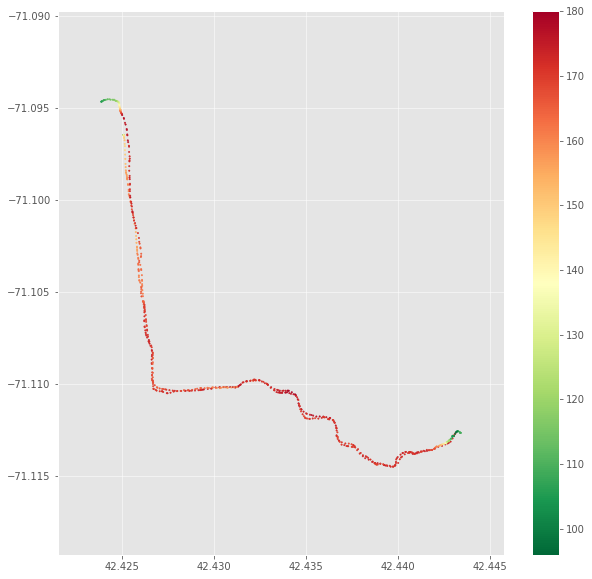

In [83]:
scttr_tmp = pd.DataFrame(tmp_0['latlng'].data)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
c = tmp_0['heartrate'].data
tst = ax.scatter(scttr_tmp[0],scttr_tmp[1],c=c, cmap='RdYlGn_r', s=2)
ax.axis('equal')
plt.colorbar(tst, ax=ax)

(array([  9.,   6.,  12.,   9.,   7.,   6.,   6.,   5.,   3.,   2.,   6.,
          3.,  10.,  10.,  18.,  51.,  53., 135., 209.,  49.]),
 array([ 96. , 100.2, 104.4, 108.6, 112.8, 117. , 121.2, 125.4, 129.6,
        133.8, 138. , 142.2, 146.4, 150.6, 154.8, 159. , 163.2, 167.4,
        171.6, 175.8, 180. ]),
 <a list of 20 Patch objects>)

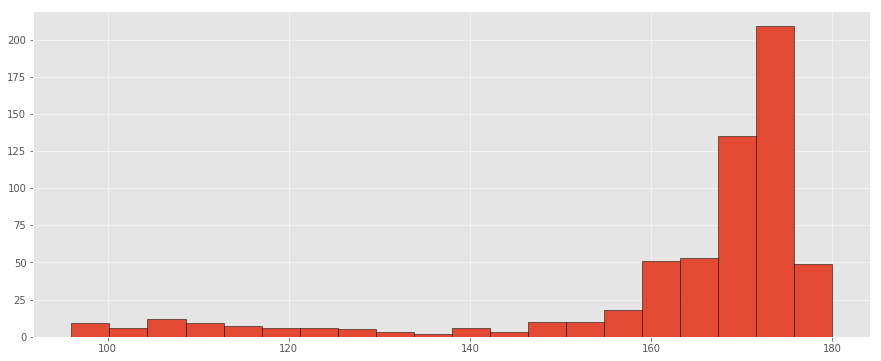

In [84]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
ax.hist(tmp_0['heartrate'].data, bins=20, edgecolor='black')

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.plot(tmp_0['heartrate'].data, linewidth=.5)

In [ ]:
tmp_0.keys()